# Wczytanie bibliotek

In [1]:
import numpy as np
import pandas as pd
import re

# PANDAS - wstęp

Jeden z najczęściej pobieranych pakietów Python

https://hugovk.github.io/top-pypi-packages/

Nazwa pochodzi od PANel DAta, danych panelowych używanych w ekonometrii (dane zbierane dla tych samych osób w wielu przedziałach czasowych)

Służy do wczytywania i analizowania danych, w szczególności ramek danych (data frames) i szeregów czasowych

Ma bardzo dobrą wydajność - jest zbudowany w oparciu o pakiet numpy

Ramki danych (data frames) w pandas mają bardzo dużo funkcjonalnośći, można robić nanich operacje typu numpy, typu SQL, prezentować graficznie, itd.


Pandas user guide:
https://pandas.pydata.org/docs/user_guide/index.html

## Plan na dzisiaj:

1. Wczytywanie danych

2. Serie i ramki danych (Series and Data Frames)

3. Indeksowanie

4. Typy danych

5. Filtrowanie

6. Dane jakościowe

7. Zmiana kolumn i wierszy

8. Obsługa obserwacji brakujących

9. Dodawanie/usuwanie wierszy i kolumn

10. Sortowanie

11. Grupowanie i agregacja

12. Dane dotyczące daty i godziny

13. Obsługa dużych danych - dzielenie na kawałki


## 1. Wczytywanie danych

Zbiór danych MovieLens 100K

https://grouplens.org/datasets/movielens/

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv

In [2]:
ratings = pd.read_csv("u.data", sep = "\t", header = None) # otwieram w notatniku, sprawdzam jakie parametry

In [3]:
ratings

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


data frame - wiersze i kolumny danych (w skrócie), 100 000 wierszy, 4 kolumny

indeks, nazwy kolumn

In [4]:
ratings = pd.read_csv("u.data", sep = "\t", header = None, names = ['user_id', 'item_id', 'rating',  'timestamp'])

In [5]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
ratings.shape ## atrybut

(100000, 4)

In [7]:
ratings.info() # metoda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
ratings.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [10]:
ratings.tail()

,user_id,item_id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


Git installed

w wiersz polecenia

C:\Users\Aga\Documents\Sages\pandas_matplotlib\pandas\ml-100k>file *

In [11]:
# items = pd.read_csv("u.item", sep="|", header = None)

In [12]:
items = pd.read_csv("u.item", sep="|", header = None, encoding = "ISO-8859-1")

In [13]:
items.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
items.info() # object to zwykle string albo jakiś typ mieszany

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1682 non-null   int64  
 1   1       1682 non-null   object 
 2   2       1681 non-null   object 
 3   3       0 non-null      float64
 4   4       1679 non-null   object 
 5   5       1682 non-null   int64  
 6   6       1682 non-null   int64  
 7   7       1682 non-null   int64  
 8   8       1682 non-null   int64  
 9   9       1682 non-null   int64  
 10  10      1682 non-null   int64  
 11  11      1682 non-null   int64  
 12  12      1682 non-null   int64  
 13  13      1682 non-null   int64  
 14  14      1682 non-null   int64  
 15  15      1682 non-null   int64  
 16  16      1682 non-null   int64  
 17  17      1682 non-null   int64  
 18  18      1682 non-null   int64  
 19  19      1682 non-null   int64  
 20  20      1682 non-null   int64  
 21  21      1682 non-null   int64  
 22  

### Zadanie 1: wczytywanie danych

Wczytaj dane u.genre jako genre i u.users jako users. Ramce users nadaj nazwy kolumn takie jak w opisie README, 
zamiast " " użyj "_". Sprawdź liczbę wierszy i kolumn, wyświetl pierwsze 7 obserwacji. 

In [15]:
genre = pd.read_csv("u.genre", sep = "|", header = None)

In [16]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
 1   1       19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [17]:
genre

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [18]:
users = pd.read_csv("u.user", sep = "|", header = None, names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [19]:
users.head(7)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


## 2. Serie i ramki danych (Series and Data Frames)

In [21]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [22]:
users["gender"]

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [23]:
users["gender"].value_counts() # zliczanie wystąpień

M    670
F    273
Name: gender, dtype: int64

### krojenie ramek danych (slicing)

tak jak listy, ale ostatni element się wlicza

In [24]:
users.loc[0:2, "age":"occupation"]

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer


In [25]:
users.iloc[0:2, 0:2] # bez ostatniego! nie wlicza się!

,user_id,age
0,1,24
1,2,53


## 3. Indeksowanie

Ustawienie indeksu podczas wczytywania

In [26]:
genre = pd.read_csv("u.genre", sep = "|", header = None, index_col = 0, names = ["genre", "label"])

In [27]:
genre

,label
genre,
unknown,0
Action,1
Adventure,2
Animation,3
Children's,4
Comedy,5
Crime,6
Documentary,7
Drama,8


Możemy sprawdzać wygodnie etykiety poprzez wpisanie gatunku filmowego

In [28]:
genre.loc["Thriller"]

label    16
Name: Thriller, dtype: int64

Posortować po indeksie

In [29]:
genre.sort_index(ascending = False) # inplace = True, najpierw wilekie, potem małe litery

,label
genre,
unknown,0
Western,18
War,17
Thriller,16
Sci-Fi,15
Romance,14
Mystery,13
Musical,12
Horror,11


### Zadanie 2: indeksy i nazwy kolumn

 W ramce danych items dodaj nazwy kolumn i zmień indeks na movie_id. Zmień indeks w ramce danych users na user_id

In [30]:
cnam = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL"] + [*genre.index.values]

In [31]:
cnam

['movie_id',
 'movie_title',
 'release_date',
 'video_release_date',
 'IMDb_URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [32]:
items.columns = cnam

In [33]:
items.set_index("movie_id", inplace = True)

In [34]:
items.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
users.set_index("user_id", inplace = True)

### Indeksy hierarchiczne (zagnieżdżone)

In [36]:
ratings.set_index(["item_id", "user_id"], inplace = True)

In [37]:
ratings.head(10)

,,rating,timestamp
item_id,user_id,,
242,196,3,881250949
302,186,3,891717742
377,22,1,878887116
51,244,2,880606923
346,166,1,886397596
474,298,4,884182806
265,115,2,881171488
465,253,5,891628467
451,305,3,886324817


In [38]:
ratings.sort_index().head(20)

rating  timestamp
item_id user_id                   
1       1             5  874965758
        2             4  888550871
        5             4  875635748
        6             4  883599478
        10            4  877888877
        13            3  882140487
        15            1  879455635
        16            5  877717833
        17            4  885272579
        18            5  880130802
        20            3  879667963
        21            5  874951244
        23            5  874784615
        25            5  885853415
        26            3  891350625
        38            5  892430636
        41            4  890692860
        42            5  881105633
        43            5  875975579
        44            4  878341315

In [39]:
ratings.loc[2]

,rating,timestamp
user_id,,
5,3,875636053
268,2,875744173
276,4,874792436
217,3,889069782
87,4,879876074
...,...,...
798,4,875743787
49,1,888069606
807,4,892978338


## 4. Typy danych

https://pbpython.com/pandas_dtypes.html

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [41]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [42]:
users['gender'] = users['gender'].astype('category') # binarna

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         943 non-null    int64   
 1   gender      943 non-null    category
 2   occupation  943 non-null    object  
 3   zip_code    943 non-null    object  
dtypes: category(1), int64(1), object(2)
memory usage: 30.5+ KB


## 5. Filtrowanie

Porównania > < >= <=

In [44]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [45]:
nestorzy = (users["age"] > 60)

In [46]:
users.loc[nestorzy, ["age", "occupation"]]

,age,occupation
user_id,,
106,61,retired
211,66,salesman
266,62,administrator
318,65,retired
349,68,retired
351,61,educator
364,63,engineer
423,64,other
481,73,retired


Kilka wartości zmiennej jakościowej

In [47]:
users["occupation"].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [48]:
zawody_wybrane = ["educator", "programmer", "scientist", "student"]

In [49]:
filt = users["occupation"].isin(zawody_wybrane)

In [50]:
users[filt]

,age,gender,occupation,zip_code
user_id,,,,
9,29,M,student,01002
13,47,M,educator,29206
14,45,M,scientist,55106
15,49,F,educator,97301
17,30,M,programmer,06355
...,...,...,...,...
933,28,M,student,48105
937,48,M,educator,98072
939,26,F,student,33319


### Operacje na obiektach typu string

Filmy z datą wydania w roku 1995

In [51]:
items.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
filt = items["release_date"].str.contains("1995", na = False) # na fill value for missing values

In [53]:
items.loc[filt, ["movie_title", "release_date"]]

,movie_title,release_date
movie_id,,
1,Toy Story (1995),01-Jan-1995
2,GoldenEye (1995),01-Jan-1995
3,Four Rooms (1995),01-Jan-1995
4,Get Shorty (1995),01-Jan-1995
5,Copycat (1995),01-Jan-1995
...,...,...
1574,Pharaoh's Army (1995),01-Jan-1995
1596,Nemesis 2: Nebula (1995),01-Jan-1995
1616,Desert Winds (1995),01-Jan-1995


regular expressions

tytuły filmów zaczynające się od "Star"

In [54]:
filt = items["movie_title"].str.contains('^Star[a-z]*', na = False, regex = True)

In [55]:
items.loc[filt, "movie_title"]

movie_id
50                                    Star Wars (1977)
62                                     Stargate (1994)
222                    Star Trek: First Contact (1996)
227      Star Trek VI: The Undiscovered Country (1991)
228                Star Trek: The Wrath of Khan (1982)
229         Star Trek III: The Search for Spock (1984)
230               Star Trek IV: The Voyage Home (1986)
271                           Starship Troopers (1997)
380                      Star Trek: Generations (1994)
449               Star Trek: The Motion Picture (1979)
450             Star Trek V: The Final Frontier (1989)
1068    Star Maker, The (Uomo delle stelle, L') (1995)
1265                                  Star Maps (1997)
1293                                   Star Kid (1997)
1464               Stars Fell on Henrietta, The (1995)
Name: movie_title, dtype: object

### Zadanie 3: filtrowanie

Sprawdź, ile części Ojca Chrzestnego jest w zbiorze danych.

In [56]:
filt = items["movie_title"].str.contains("Godfather", na = False) # na fill value for missing values

In [57]:
items.loc[filt, "movie_title"]

movie_id
127             Godfather, The (1972)
187    Godfather: Part II, The (1974)
Name: movie_title, dtype: object

## 7. Zmiana kolumn i wierszy

### Zadanie 4: zmiana kolumn

Dla danych users, zmiennej gender zamień skróty literowe na słowa: 
    F na Female, M na Male

In [58]:
users["gender"]. value_counts()

M    670
F    273
Name: gender, dtype: int64

In [59]:
users["gender"] = users["gender"].map({'F':'Female', 'M': 'Male'})

In [60]:
users["gender"]. value_counts()

Male      670
Female    273
Name: gender, dtype: int64

## 9. Dodawanie/usuwanie wierszy i kolumn

### Zadanie 5: dodawanie/usuwanie wierszy

Do ramki danych items dodaj kolumnę year, w której będzie rok wydania filmu typu integer. 
Jeżeli kolumna video_release_date zawiera same braki danych, usuń ją.

In [61]:
items["year"] = items["release_date"].str.slice(start = -4)

In [62]:
items["year"]. value_counts()

1996    355
1997    286
1995    219
1994    214
1993    126
       ... 
1930      1
1931      1
1922      1
1932      1
1926      1
Name: year, Length: 71, dtype: int64

In [63]:
pd.set_option("display.max_rows", 71)

In [64]:
items["year"]. value_counts()

1996    355
1997    286
1995    219
1994    214
1993    126
1998     65
1992     37
1990     24
1991     22
1989     15
1986     15
1982     13
1987     13
1981     12
1988     11
1958      9
1979      9
1940      8
1957      8
1980      8
1974      8
1984      8
1971      7
1939      7
1954      7
1950      7
1985      7
1975      6
1963      6
1968      6
1951      5
1946      5
1976      5
1967      5
1944      5
1962      5
1965      5
1955      5
1983      5
1941      5
1960      5
1947      5
1977      4
1949      4
1959      4
1943      4
1945      4
1978      4
1973      4
1956      4
1937      4
1934      4
1935      4
1969      4
1948      3
1952      3
1961      3
1938      3
1972      3
1970      3
1953      2
1942      2
1933      2
1936      2
1964      2
1966      2
1930      1
1931      1
1922      1
1932      1
1926      1
Name: year, dtype: int64

In [65]:
items.loc[items["year"].isna()]

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
267,unknown,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [66]:
items.drop(index = 267, inplace = True)

In [67]:
items.shape

(1681, 24)

In [68]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1682
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1681 non-null   object 
 1   release_date        1681 non-null   object 
 2   video_release_date  0 non-null      float64
 3   IMDb_URL            1679 non-null   object 
 4   unknown             1681 non-null   int64  
 5   Action              1681 non-null   int64  
 6   Adventure           1681 non-null   int64  
 7   Animation           1681 non-null   int64  
 8   Children's          1681 non-null   int64  
 9   Comedy              1681 non-null   int64  
 10  Crime               1681 non-null   int64  
 11  Documentary         1681 non-null   int64  
 12  Drama               1681 non-null   int64  
 13  Fantasy             1681 non-null   int64  
 14  Film-Noir           1681 non-null   int64  
 15  Horror              1681 non-null   int64  
 16  Musica

In [69]:
items["year"] = items["year"].astype("int")

In [70]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1682
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1681 non-null   object 
 1   release_date        1681 non-null   object 
 2   video_release_date  0 non-null      float64
 3   IMDb_URL            1679 non-null   object 
 4   unknown             1681 non-null   int64  
 5   Action              1681 non-null   int64  
 6   Adventure           1681 non-null   int64  
 7   Animation           1681 non-null   int64  
 8   Children's          1681 non-null   int64  
 9   Comedy              1681 non-null   int64  
 10  Crime               1681 non-null   int64  
 11  Documentary         1681 non-null   int64  
 12  Drama               1681 non-null   int64  
 13  Fantasy             1681 non-null   int64  
 14  Film-Noir           1681 non-null   int64  
 15  Horror              1681 non-null   int64  
 16  Musica

In [71]:
items["video_release_date"].value_counts()

Series([], Name: video_release_date, dtype: int64)

In [72]:
items.drop(columns = "video_release_date", inplace = True)

In [73]:
items.head()

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


### 10. Sortowanie

### Zadanie 6: sortowanie

Znajdź 20 najmłodszych użytkowników w ramce danych users.

In [74]:
users.sort_values(by = 'age', ascending = True).head(20)

,age,gender,occupation,zip_code
user_id,,,,
30,7,Male,student,55436
471,10,Male,student,77459
289,11,Male,none,94619
880,13,Male,student,83702
609,13,Female,student,55106
142,13,Male,other,48118
674,13,Female,student,55337
628,13,Male,none,94306
813,14,Female,student,02136


In [75]:
users.nsmallest(20, 'age') # nlargest

,age,gender,occupation,zip_code
user_id,,,,
30,7,Male,student,55436
471,10,Male,student,77459
289,11,Male,none,94619
142,13,Male,other,48118
609,13,Female,student,55106
628,13,Male,none,94306
674,13,Female,student,55337
880,13,Male,student,83702
206,14,Female,student,53115


## 11. Grupowanie i agregacja

agregacja

In [76]:
users['age'].median() # ignoruje braki w danych, mean, std

31.0

In [77]:
users['age'].std()

12.192739733059044

In [78]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         943 non-null    int64   
 1   gender      943 non-null    category
 2   occupation  943 non-null    object  
 3   zip_code    943 non-null    object  
dtypes: category(1), int64(1), object(2)
memory usage: 30.5+ KB


In [79]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [80]:
users['occupation'] = users['occupation'].astype("category")

In [81]:
users.describe(include = "category")

,gender,occupation
count,943,943
unique,2,21
top,Male,student
freq,670,196


In [82]:
users['gender'].count() # niebrakujące zlicza

943

In [83]:
users['gender'].value_counts() 

Male      670
Female    273
Name: gender, dtype: int64

In [84]:
users['gender'].value_counts(normalize = True) 

Male      0.710498
Female    0.289502
Name: gender, dtype: float64

grupowanie

splitting (dzielenie na grupy wedug zadanego kryterium)

applying (użycie fcji do każdej z grup niezależnie)

combining (łączenie wyników)

In [85]:
occ_grp = users.groupby(['occupation'])

In [86]:
occ_grp

In [87]:
occ_grp.get_group('student') # trochę jak filtrownie, filtrowanie dla wszystkich możliwych wartości

,age,gender,occupation,zip_code
user_id,,,,
9,29,Male,student,01002
30,7,Male,student,55436
32,28,Female,student,78741
33,23,Male,student,27510
36,19,Female,student,93117
...,...,...,...,...
928,21,Male,student,55408
933,28,Male,student,48105
939,26,Female,student,33319


In [88]:
occ_grp['gender'].value_counts() # seria z hierarchicznym indeskem

occupation     gender
administrator  Male       43
               Female     36
artist         Male       15
               Female     13
doctor         Male        7
               Female      0
educator       Male       69
               Female     26
engineer       Male       65
               Female      2
entertainment  Male       16
               Female      2
executive      Male       29
               Female      3
healthcare     Female     11
               Male        5
homemaker      Female      6
               Male        1
lawyer         Male       10
               Female      2
librarian      Female     29
               Male       22
marketing      Male       16
               Female     10
none           Male        5
               Female      4
other          Male       69
               Female     36
programmer     Male       60
               Female      6
retired        Male       13
               Female      1
salesman       Male        9
               Female

In [89]:
occ_grp['gender'].value_counts().loc['retired']

gender
Male      13
Female     1
Name: gender, dtype: int64

In [90]:
pd.crosstab(users['occupation'], users['gender'])

gender,Female,Male
occupation,,
administrator,36,43
artist,13,15
doctor,0,7
educator,26,69
engineer,2,65
entertainment,2,16
executive,3,29
healthcare,11,5
homemaker,6,1


In [91]:
occ_grp['age'].median()

occupation
administrator    37.0
artist           30.0
doctor           45.0
educator         42.0
engineer         36.0
entertainment    25.0
executive        38.5
healthcare       44.5
homemaker        32.0
lawyer           34.0
librarian        39.0
marketing        36.0
none             26.0
other            32.0
programmer       30.0
retired          63.0
salesman         34.0
scientist        37.0
student          21.0
technician       30.0
writer           36.0
Name: age, dtype: float64

In [92]:
occ_grp['age'].median().loc['doctor']

45.0

In [93]:
occ_grp['age'].agg(['median', 'mean', 'std'])

,median,mean,std
occupation,,,
administrator,37.0,38.746835,11.123397
artist,30.0,31.392857,8.668116
doctor,45.0,43.571429,12.501428
educator,42.0,42.010526,10.413264
engineer,36.0,36.388060,11.199236
entertainment,25.0,29.222222,10.056052
executive,38.5,38.718750,10.608075
healthcare,44.5,41.562500,11.313524
homemaker,32.0,32.571429,10.737119


Ile kodów pocztowych zaczyna się od "0" w podziale na zawody?

In [94]:
# occ_grp['zip_code'].str.startswith('0').sum()

In [95]:
occ_grp['zip_code'].apply(lambda x: x.str.startswith('0').sum())

occupation
administrator     9
artist            2
doctor            0
educator          9
engineer         15
entertainment     4
executive         3
healthcare        2
homemaker         0
lawyer            1
librarian         6
marketing         3
none              0
other             9
programmer        8
retired           2
salesman          0
scientist         3
student          16
technician        3
writer            1
Name: zip_code, dtype: int64

### Zadanie 7

Policz:

    - jaka jest łączna liczba filmów w danych?
    
    - jakie gatunki filmowe są w zbiorze najczęstsze?
    
    - jaki jest wiek osób w zalezności od płci - policz medianę i średnią
    
    - jaki jest rozkład średnich ocen (dla filmu) w zbiorze - znajdź średnią, odchylenie standardowe, kwartyle, maximum i minimum
    

In [96]:
items['movie_title'].count()

1681

In [97]:
items.head()

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [98]:
items.loc[:,'Action':'Western'].sum().sort_values(ascending = False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

In [99]:
gender_grp = users.groupby(['gender'])

In [100]:
gender_grp['age'].agg(['median', 'mean'])

,median,mean
gender,,
Female,32.0,33.813187
Male,31.0,34.149254


In [101]:
ratings.head()

,,rating,timestamp
item_id,user_id,,
242,196,3,881250949
302,186,3,891717742
377,22,1,878887116
51,244,2,880606923
346,166,1,886397596


In [102]:
item_grp = ratings.groupby(['item_id'])

In [103]:
ratings_mean = item_grp['rating'].mean()

In [104]:
ratings_mean.describe()

count    1682.000000
mean        3.076045
std         0.781662
min         1.000000
25%         2.659600
50%         3.161528
75%         3.653428
max         5.000000
Name: rating, dtype: float64

merge

https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Jakie są 20 najwyżej oceniane filmy w zbiorze wg średniej oceny?

In [105]:
items.head(2)

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [106]:
ratings_stats = item_grp['rating'].agg(['mean', 'count'])

In [107]:
ratings_stats.head(2)

,mean,count
item_id,,
1,3.878319,452
2,3.206107,131


In [108]:
items_with_ratings = items.merge(ratings_stats, left_on = "movie_id", right_on = "item_id")

In [109]:
items_with_ratings.head()

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,mean,count
0,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1995,3.878319,452
1,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1995,3.206107,131
2,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,3.033333,90
3,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1995,3.550239,209
4,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1995,3.302326,86


In [110]:
items_with_ratings.sort_values(by="mean", ascending=False, inplace = True)

In [111]:
items_with_ratings.rename(columns = {'mean':'mean_rating'}, inplace = True)

In [112]:
items_with_ratings[["movie_title", "mean_rating"]].head(20)

,movie_title,mean_rating
812,"Great Day in Harlem, A (1994)",5.000000
1597,Someone Else's America (1995),5.000000
1199,Marlene Dietrich: Shadow and Light (1996),5.000000
1120,They Made Me a Criminal (1939),5.000000
1651,Entertaining Angels: The Dorothy Day Story (1996),5.000000
1291,Star Kid (1997),5.000000
1498,Santa with Muscles (1996),5.000000
1187,Prefontaine (1997),5.000000
1534,Aiqing wansui (1994),5.000000
1465,"Saint of Fort Washington, The (1993)",5.000000


### Zadanie 8: najlepszy film często oceniany

Znajdź najlepiej oceniany film pośród filmów ocenianych co najmniej 100 razy.

In [113]:
items_with_ratings[["movie_title", "mean_rating", "count"]].head(20)

,movie_title,mean_rating,count
812,"Great Day in Harlem, A (1994)",5.000000,1
1597,Someone Else's America (1995),5.000000,1
1199,Marlene Dietrich: Shadow and Light (1996),5.000000,1
1120,They Made Me a Criminal (1939),5.000000,1
1651,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1
1291,Star Kid (1997),5.000000,3
1498,Santa with Muscles (1996),5.000000,2
1187,Prefontaine (1997),5.000000,3
1534,Aiqing wansui (1994),5.000000,1
1465,"Saint of Fort Washington, The (1993)",5.000000,2


In [114]:
filt = (items_with_ratings["count"] > 100)

In [115]:
items_with_ratings.loc[filt, ["movie_title", "mean_rating", "count"]].head(20)

,movie_title,mean_rating,count
406,"Close Shave, A (1995)",4.491071,112
316,Schindler's List (1993),4.466443,298
168,"Wrong Trousers, The (1993)",4.466102,118
481,Casablanca (1942),4.456790,243
63,"Shawshank Redemption, The (1994)",4.445230,283
601,Rear Window (1954),4.387560,209
11,"Usual Suspects, The (1995)",4.385768,267
49,Star Wars (1977),4.358491,583
177,12 Angry Men (1957),4.344000,125
133,Citizen Kane (1941),4.292929,198


najlepsze filmy według mężczyzn i kobiet

### Zadanie 9

Kobiety czy mężczyźni oceniają częściej/wyżej (policz średnią ocenę i średnią częstość dla oceniających w podziale na płeć)? Jaki rozkład częstości ocen jest w grupach wiekowych (stwórz grupy wiekowe za pomocą fcji pd.cut i policz średnią częstość wystawiania ocen)?

In [116]:
ratings.head()

,,rating,timestamp
item_id,user_id,,
242,196,3,881250949
302,186,3,891717742
377,22,1,878887116
51,244,2,880606923
346,166,1,886397596


In [117]:
user_grp = ratings.groupby(['user_id'])

In [118]:
user_stats = user_grp['rating'].agg(['mean', 'count'])

In [119]:
user_stats.head()

,mean,count
user_id,,
1,3.610294,272
2,3.709677,62
3,2.796296,54
4,4.333333,24
5,2.874286,175


In [120]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,Male,technician,85711
2,53,Female,other,94043
3,23,Male,writer,32067
4,24,Male,technician,43537
5,33,Female,other,15213


In [121]:
users_with_stats = users.merge(user_stats, on = "user_id")

In [122]:
users_with_stats.head()

,age,gender,occupation,zip_code,mean,count
user_id,,,,,,
1,24,Male,technician,85711,3.610294,272
2,53,Female,other,94043,3.709677,62
3,23,Male,writer,32067,2.796296,54
4,24,Male,technician,43537,4.333333,24
5,33,Female,other,15213,2.874286,175


In [123]:
gender_grp = users_with_stats.groupby(['gender'])

In [124]:
gender_grp['mean'].mean()

gender
Female    3.587179
Male      3.588604
Name: mean, dtype: float64

In [125]:
gender_grp['count'].mean()

gender
Female     94.285714
Male      110.835821
Name: count, dtype: float64

In [126]:
users_with_stats['age_grp'] = pd.cut(users_with_stats['age'], np.linspace(0, 100, 11))

In [127]:
users_with_stats.head()

,age,gender,occupation,zip_code,mean,count,age_grp
user_id,,,,,,,
1,24,Male,technician,85711,3.610294,272,"(20.0, 30.0]"
2,53,Female,other,94043,3.709677,62,"(50.0, 60.0]"
3,23,Male,writer,32067,2.796296,54,"(20.0, 30.0]"
4,24,Male,technician,43537,4.333333,24,"(20.0, 30.0]"
5,33,Female,other,15213,2.874286,175,"(30.0, 40.0]"


In [128]:
age_grp = users_with_stats.groupby(['age_grp'])

In [129]:
age_grp['mean'].mean()

age_grp
(0.0, 10.0]      3.577269
(10.0, 20.0]     3.557617
(20.0, 30.0]     3.538363
(30.0, 40.0]     3.615880
(40.0, 50.0]     3.602004
(50.0, 60.0]     3.733803
(60.0, 70.0]     3.551229
(70.0, 80.0]     3.982143
(80.0, 90.0]          NaN
(90.0, 100.0]         NaN
Name: mean, dtype: float64

In [130]:
age_grp['count'].mean()

age_grp
(0.0, 10.0]       37.000000
(10.0, 20.0]     114.383178
(20.0, 30.0]     115.657817
(30.0, 40.0]     106.614350
(40.0, 50.0]      91.293413
(50.0, 60.0]      99.361446
(60.0, 70.0]      55.000000
(70.0, 80.0]      56.000000
(80.0, 90.0]            NaN
(90.0, 100.0]           NaN
Name: count, dtype: float64

https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59

https://sparkbyexamples.com/pandas/pandas-join-vs-merge-explained-differences/

## 12. Dane dotyczące daty i godziny

In [131]:
ratings['datim'] = ratings["timestamp"].apply(lambda x: pd.to_datetime(x, unit='s'))

In [132]:
ratings.head()

,,rating,timestamp,datim
item_id,user_id,,,
242,196,3,881250949,1997-12-04 15:55:49
302,186,3,891717742,1998-04-04 19:22:22
377,22,1,878887116,1997-11-07 07:18:36
51,244,2,880606923,1997-11-27 05:02:03
346,166,1,886397596,1998-02-02 05:33:16


In [133]:
ratings['day_name'] = ratings['datim'].dt.day_name()

In [134]:
ratings.head()

,,rating,timestamp,datim,day_name
item_id,user_id,,,,
242,196,3,881250949,1997-12-04 15:55:49,Thursday
302,186,3,891717742,1998-04-04 19:22:22,Saturday
377,22,1,878887116,1997-11-07 07:18:36,Friday
51,244,2,880606923,1997-11-27 05:02:03,Thursday
346,166,1,886397596,1998-02-02 05:33:16,Monday


In [135]:
filt = items['movie_title'].str.contains('One Flew Over the Cuckoo')

In [136]:
items[filt]

,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
357,One Flew Over the Cuckoo's Nest (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?One%20Flew%20...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975


In [160]:
cuckoo = ratings.loc[357].copy()

In [161]:
cuckoo

,rating,timestamp,datim,day_name
user_id,,,,
154,4,879138713,1997-11-10 05:11:53,Monday
25,4,885852757,1998-01-26 22:12:37,Monday
286,4,877531537,1997-10-22 14:45:37,Wednesday
254,3,886472466,1998-02-03 02:21:06,Tuesday
276,5,874787526,1997-09-20 20:32:06,Saturday
...,...,...,...,...
232,4,888549721,1998-02-27 03:22:01,Friday
18,4,880129421,1997-11-21 16:23:41,Friday
694,5,875726618,1997-10-01 17:23:38,Wednesday


In [162]:
cuckoo['datim'].min()

Timestamp('1997-09-20 03:18:05')

In [163]:
cuckoo['datim'].max()

Timestamp('1998-04-22 02:54:05')

In [164]:
cuckoo['datim'].max() - cuckoo['datim'].min() # time delta

Timedelta('213 days 23:36:00')

In [165]:
filt1 = (cuckoo['datim'] >= '1998') # Python will know it's a year....

In [166]:
cuckoo.loc[filt1]

,rating,timestamp,datim,day_name
user_id,,,,
25,4,885852757,1998-01-26 22:12:37,Monday
254,3,886472466,1998-02-03 02:21:06,Tuesday
210,5,887736206,1998-02-17 17:23:26,Tuesday
73,5,888626007,1998-02-28 00:33:27,Saturday
4,4,892003525,1998-04-08 02:45:25,Wednesday
...,...,...,...,...
864,5,888887794,1998-03-03 01:16:34,Tuesday
642,2,885603565,1998-01-24 00:59:25,Saturday
836,5,885754173,1998-01-25 18:49:33,Sunday


In [167]:
filt2 = (cuckoo['datim'] >= pd.to_datetime('1998-01-01')) # Python will know it's a year....

In [168]:
cuckoo.loc[filt2]

,rating,timestamp,datim,day_name
user_id,,,,
25,4,885852757,1998-01-26 22:12:37,Monday
254,3,886472466,1998-02-03 02:21:06,Tuesday
210,5,887736206,1998-02-17 17:23:26,Tuesday
73,5,888626007,1998-02-28 00:33:27,Saturday
4,4,892003525,1998-04-08 02:45:25,Wednesday
...,...,...,...,...
864,5,888887794,1998-03-03 01:16:34,Tuesday
642,2,885603565,1998-01-24 00:59:25,Saturday
836,5,885754173,1998-01-25 18:49:33,Sunday


In [169]:
cuckoo.reset_index(inplace = True)

In [170]:
cuckoo.set_index('datim', inplace = True)

In [171]:
cuckoo.sort_index(inplace = True)

In [172]:
cuckoo.loc['1998']

,user_id,rating,timestamp,day_name
datim,,,,
1998-01-02 18:54:06,508,5,883767246,Friday
1998-01-02 23:40:56,530,5,883784456,Friday
1998-01-03 01:03:06,617,4,883789386,Saturday
1998-01-04 21:06:00,846,4,883947960,Sunday
1998-01-06 18:26:57,201,4,884111217,Tuesday
...,...,...,...,...
1998-04-15 17:46:40,796,4,892662400,Wednesday
1998-04-15 19:22:10,214,5,892668130,Wednesday
1998-04-17 01:41:14,551,5,892777274,Friday


In [173]:
cuckoo.loc['1998-01':'1998-06']

,user_id,rating,timestamp,day_name
datim,,,,
1998-01-02 18:54:06,508,5,883767246,Friday
1998-01-02 23:40:56,530,5,883784456,Friday
1998-01-03 01:03:06,617,4,883789386,Saturday
1998-01-04 21:06:00,846,4,883947960,Sunday
1998-01-06 18:26:57,201,4,884111217,Tuesday
...,...,...,...,...
1998-04-15 17:46:40,796,4,892662400,Wednesday
1998-04-15 19:22:10,214,5,892668130,Wednesday
1998-04-17 01:41:14,551,5,892777274,Friday


resampling

In [174]:
cuckoo['rating'].resample('D').max()

datim
1997-09-20    5.0
1997-09-21    4.0
1997-09-22    NaN
1997-09-23    4.0
1997-09-24    4.0
             ... 
1998-04-18    NaN
1998-04-19    NaN
1998-04-20    NaN
1998-04-21    NaN
1998-04-22    5.0
Freq: D, Name: rating, Length: 215, dtype: float64

In [175]:
cuckoo['rating'].resample('W').max()

datim
1997-09-21    5
1997-09-28    5
1997-10-05    5
1997-10-12    5
1997-10-19    5
1997-10-26    5
1997-11-02    5
1997-11-09    5
1997-11-16    5
1997-11-23    5
1997-11-30    5
1997-12-07    5
1997-12-14    5
1997-12-21    5
1997-12-28    5
1998-01-04    5
1998-01-11    5
1998-01-18    5
1998-01-25    5
1998-02-01    5
1998-02-08    5
1998-02-15    5
1998-02-22    5
1998-03-01    5
1998-03-08    5
1998-03-15    5
1998-03-22    5
1998-03-29    5
1998-04-05    5
1998-04-12    5
1998-04-19    5
1998-04-26    5
Freq: W-SUN, Name: rating, dtype: int64

In [176]:
cuckoo_weekly_means = cuckoo['rating'].resample('W').mean()

<Axes: xlabel='datim'>

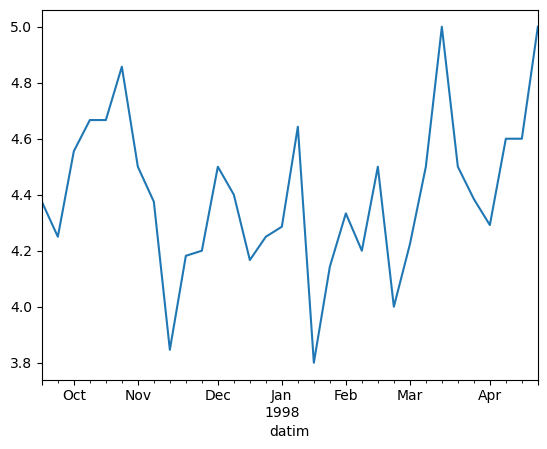

In [177]:
cuckoo_weekly_means.plot()

In [178]:
cuckoo_weekly_means

datim
1997-09-21    4.375000
1997-09-28    4.250000
1997-10-05    4.555556
1997-10-12    4.666667
1997-10-19    4.666667
1997-10-26    4.857143
1997-11-02    4.500000
1997-11-09    4.375000
1997-11-16    3.846154
1997-11-23    4.181818
1997-11-30    4.200000
1997-12-07    4.500000
1997-12-14    4.400000
1997-12-21    4.166667
1997-12-28    4.250000
1998-01-04    4.285714
1998-01-11    4.642857
1998-01-18    3.800000
1998-01-25    4.142857
1998-02-01    4.333333
1998-02-08    4.200000
1998-02-15    4.500000
1998-02-22    4.000000
1998-03-01    4.222222
1998-03-08    4.500000
1998-03-15    5.000000
1998-03-22    4.500000
1998-03-29    4.384615
1998-04-05    4.291667
1998-04-12    4.600000
1998-04-19    4.600000
1998-04-26    5.000000
Freq: W-SUN, Name: rating, dtype: float64

In [179]:
cuckoo_weekly_means.to_csv("cuckoo_weekly.csv")

## 13. Obsługa dużych danych - dzielenie na kawałki

duże dane, np. 20GB, wczytanie w kawałkach

In [157]:
for user in pd.read_csv("u.user", sep = "|", header = None, names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], chunksize = 100):
    print("Chunk DF")
    print(user)

Chunk DF
    user_id  age gender  occupation zip_code
0         1   24      M  technician    85711
1         2   53      F       other    94043
2         3   23      M      writer    32067
3         4   24      M  technician    43537
4         5   33      F       other    15213
..      ...  ...    ...         ...      ...
95       96   25      F      artist    75206
96       97   43      M      artist    98006
97       98   49      F   executive    90291
98       99   20      M     student    63129
99      100   36      M   executive    90254

[100 rows x 5 columns]
Chunk DF
     user_id  age gender  occupation zip_code
100      101   15      M     student    05146
101      102   38      M  programmer    30220
102      103   26      M     student    55108
103      104   27      M     student    55108
104      105   24      M    engineer    94043
..       ...  ...    ...         ...      ...
195      196   49      M      writer    55105
196      197   55      M  technician    75094
197 

In [158]:
new_df = pd.DataFrame()
for user in pd.read_csv("u.user", sep = "|", header = None, names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], chunksize = 100):
    gender_grp = user.groupby(['gender'])
    results = gender_grp["user_id"].count()
    new_df = pd.concat([new_df, results], axis = 1)

In [159]:
new_df

,user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id
F,28,25,36,23,27,27,28,36,27,16
M,72,75,64,77,73,73,72,64,73,27
